In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hyperparameter_tuning.csv")
df.head()

,number,value,datetime_start,datetime_complete,duration,params_bias_mutate_power,params_compatibility_disjoint_coefficient,params_compatibility_weight_coefficient,params_conn_add_prob,params_conn_delete_prob,params_node_add_prob,params_node_delete_prob,params_weight_mutate_power,state
0,0,0.313093,2020-06-08 00:02:23.242048,2020-06-08 00:22:30.585055,0 days 00:20:07.343007000,0.023573,0.964436,0.331189,0.087319,0.072851,0.129422,0.016591,0.402402,COMPLETE
1,1,0.314175,2020-06-08 00:22:30.586544,2020-06-08 00:42:34.492495,0 days 00:20:03.905951000,0.172439,0.882670,0.460029,0.039268,0.054837,0.073697,0.038728,0.628027,COMPLETE
2,2,0.314135,2020-06-08 00:42:34.493983,2020-06-08 01:04:49.274573,0 days 00:22:14.780590000,0.344178,1.022416,0.559450,0.056890,0.059057,0.195401,0.075884,0.823936,COMPLETE
3,3,0.313889,2020-06-08 01:04:49.276062,2020-06-08 01:23:03.292077,0 days 00:18:14.016015000,0.426599,1.024565,0.486745,0.062564,0.075648,0.078790,0.008018,0.265133,COMPLETE
4,4,0.313801,2020-06-08 01:23:03.293557,2020-06-08 01:42:46.228862,0 days 00:19:42.935305000,0.352843,0.919588,0.344077,0.043484,0.044793,0.198912,0.091382,0.999680,COMPLETE


In [3]:
y = df["value"]
data = df.drop(["state", "number", 
             "datetime_start", "datetime_complete",
             "duration"], axis=1)
X = data.drop(["value"], axis=1)

In [4]:
corr = data.corr()["value"].drop(["value"]).abs()

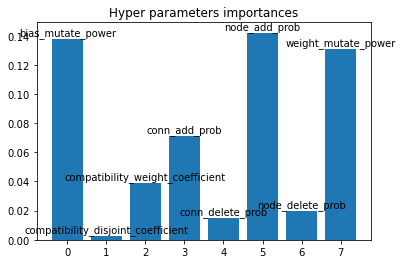

In [5]:
fig, ax = plt.subplots()
plt.title("Hyper parameters importances")
rects = ax.bar(range(len(corr)), corr)
keys = corr.keys()
for i, rect in enumerate(rects):
    ax.annotate('{}'.format(keys[i][7:]),
                xy=(rect.get_x() + rect.get_width() / 2, corr[keys[i]]),
                xytext=(0, 1),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')



Text(0, 0.5, 'Fitness')

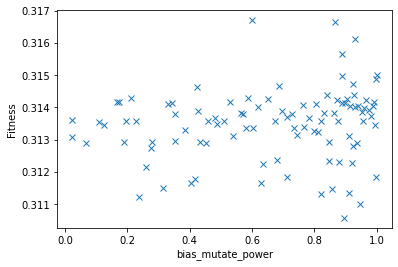

In [6]:
plt.plot(X["params_bias_mutate_power"], y, "x")
plt.xlabel("bias_mutate_power")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

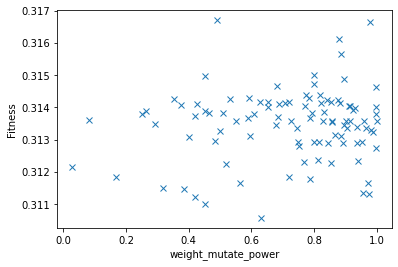

In [7]:
plt.plot(X["params_weight_mutate_power"], y, "x")
plt.xlabel("weight_mutate_power")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

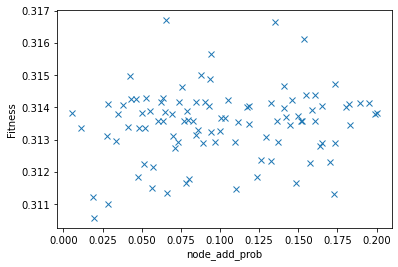

In [8]:
plt.plot(X["params_node_add_prob"], y, "x")
plt.xlabel("node_add_prob")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

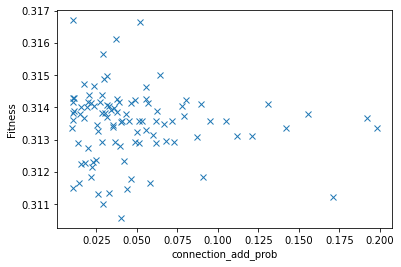

In [9]:
plt.plot(X["params_conn_add_prob"], y, "x")
plt.xlabel("connection_add_prob")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

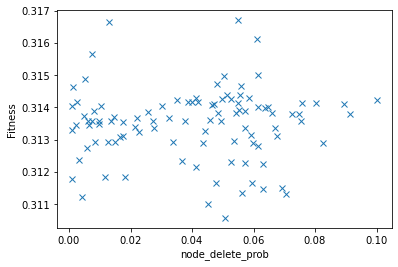

In [10]:
plt.plot(X["params_node_delete_prob"], y, "x")
plt.xlabel("node_delete_prob")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

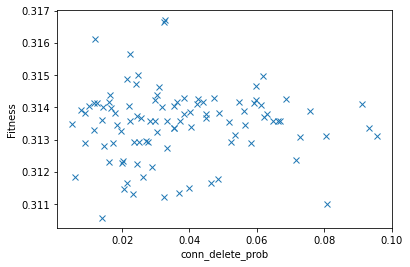

In [11]:
plt.plot(X["params_conn_delete_prob"], y, "x")
plt.xlabel("conn_delete_prob")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

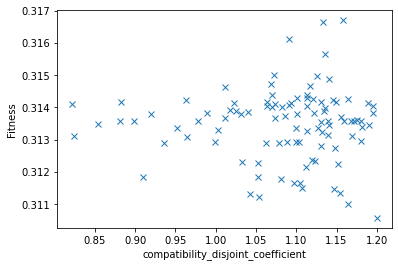

In [12]:
plt.plot(X["params_compatibility_disjoint_coefficient"], y, "x")
plt.xlabel("compatibility_disjoint_coefficient")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

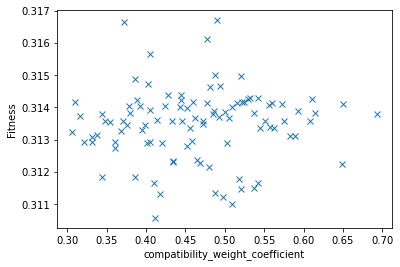

In [13]:
plt.plot(X["params_compatibility_weight_coefficient"], y, "x")
plt.xlabel("compatibility_weight_coefficient")
plt.ylabel("Fitness")

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
print("weights coef")
print("cst :", model.coef_[0])
for key, w in zip(X.keys(), model.coef_[1:]):
    print(key, ":", w)

weights coef
cst : 0.00043151257425115335
params_bias_mutate_power : -0.0006401109291977297
params_compatibility_disjoint_coefficient : 0.001949795730378828
params_compatibility_weight_coefficient : -0.0033386200378743014
params_conn_add_prob : 0.0029955965157479484
params_conn_delete_prob : 0.002709529562868792
params_node_add_prob : -0.003042350278121371
params_node_delete_prob : 0.0005822582277590087


Text(0, 0.5, 'Fitness')

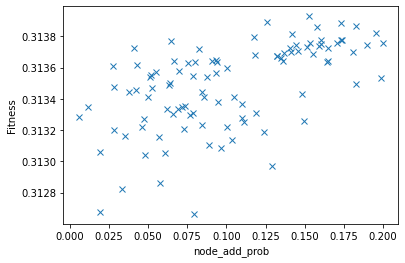

In [30]:
plt.plot(X["params_node_add_prob"], model.predict(X), "x")
plt.xlabel("node_add_prob")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

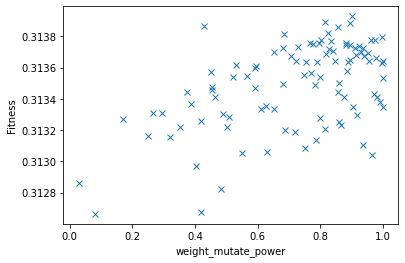

In [31]:
plt.plot(X["params_weight_mutate_power"], model.predict(X), "x")
plt.xlabel("weight_mutate_power")
plt.ylabel("Fitness")

In [ ]:
plt.plot(X["params_bias_mutate_power"], model.predict(X), "x")
plt.xlabel("bias_mutate_power")
plt.ylabel("Fitness")

In [34]:
data.iloc[64]

value                                        0.316696
params_bias_mutate_power                     0.600279
params_compatibility_disjoint_coefficient    1.157622
params_compatibility_weight_coefficient      0.490682
params_conn_add_prob                         0.010410
params_conn_delete_prob                      0.032782
params_node_add_prob                         0.065718
params_node_delete_prob                      0.054871
params_weight_mutate_power                   0.491055
Name: 64, dtype: float64

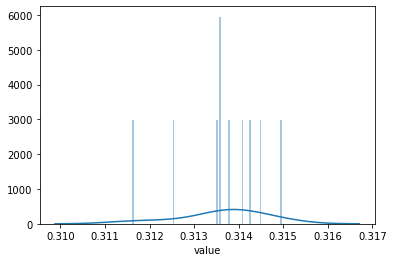

In [6]:
df2 = pd.read_csv("best_params_runs.csv")
y2 = df2["value"]
y2

import seaborn as sns
sns.distplot(y2, bins=100)